In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
Box_officeV3 = pd.read_csv('Box_office_v3_ready2Scale.csv')
Box_officeV3.head()

,Unnamed: 0,country_USA,genre_Comedy,rating_NR,square_root_budget,log_trans_gross,log_trans_score,log_trans_votes,ROI
0,0,0.0,0.0,0.0,19.283571,20.449497,2.054124,13.773021,1
1,1,1.0,0.0,0.0,19.113828,20.305737,2.054124,13.671122,1
2,2,1.0,0.0,0.0,18.826146,20.295970,1.945910,13.061817,1
3,3,1.0,0.0,0.0,19.209138,20.250631,2.091864,13.882507,1
4,4,1.0,0.0,0.0,19.035866,20.097513,2.197225,14.428452,1


In [3]:
Box_officeV3 = Box_officeV3.drop('Unnamed: 0', axis = 1)

In [4]:
Box_officeV3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_USA         6000 non-null   float64
 1   genre_Comedy        6000 non-null   float64
 2   rating_NR           6000 non-null   float64
 3   square_root_budget  6000 non-null   float64
 4   log_trans_gross     6000 non-null   float64
 5   log_trans_score     6000 non-null   float64
 6   log_trans_votes     6000 non-null   float64
 7   ROI                 6000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 375.1 KB


In [5]:
Box_officeV3['ROI'].value_counts(normalize=True)# RANDOM GIVES A 60% CHANCE IT WILL BE NON-PROFITABLE

0    0.604667
1    0.395333
Name: ROI, dtype: float64

In [6]:
Box_officeV3['ROI'].value_counts()

0    3628
1    2372
Name: ROI, dtype: int64

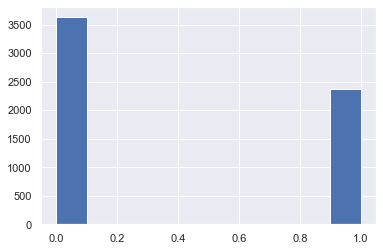

In [7]:
Box_officeV3['ROI'].hist() # 1= "PROFITABLE"

# getting ready to scale

In [8]:
from sklearn.model_selection import train_test_split
X = Box_officeV3.drop('ROI', axis = 1)
y = Box_officeV3.ROI

training_features, test_features, \
training_target, test_target, = train_test_split(X,y, test_size = .2, random_state= 45)

In [9]:
test_features.shape

(1200, 7)

In [10]:
training_features.shape

(4800, 7)

In [11]:
 test_target.shape

(1200,)

# Modeling

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree


from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection

# Baseline Model

In [19]:
Box_officeV3['ROI'].value_counts(normalize=True)

0    0.604667
1    0.395333
Name: ROI, dtype: float64

In [20]:
dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)

DummyClassifier(strategy='most_frequent')

In [21]:
test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

[0 0 0 ... 0 0 0]


In [22]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.603


In [23]:
# This is the long way of computing the accuracy score
dummy_baselineCM = confusion_matrix(test_target,test_target_pred)
dummy_baselineCM

array([[724,   0],
       [476,   0]], dtype=int64)

# Decision Tree

In [24]:
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)

In [25]:
%%time
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables

Wall time: 112 ms


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=45)

In [26]:
%%time
DTPred = DecisionTreeModel.predict(test_features)

Wall time: 12 ms


In [27]:
# Confusion Matrix
#from sklearn.model_selection import cross_val_score, cross_valPredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
# Confusion Matrix
CMTD = confusion_matrix(test_target,DTPred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[634,  90],
       [ 44, 432]], dtype=int64)

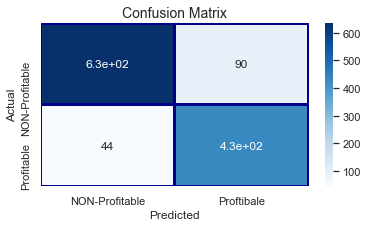

In [29]:
target ='ROI'
CMTD = pd.crosstab(test_target,DTPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

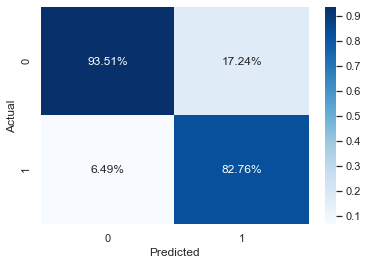

In [30]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [31]:
# Accuracy Score
ADT= accuracy_score(test_target, DTPred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 88.83%


# Robust Scaler

In [32]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
training_features = robust_scaler.fit_transform(training_features)
test_features = robust_scaler.transform(test_features)
training_features

array([[ 0.        ,  0.        ,  0.        , ...,  0.11156279,
         0.5739417 , -0.04899708],
       [ 0.        ,  1.        ,  0.        , ..., -1.3987455 ,
        -3.35190967,  0.01417171],
       [ 0.        ,  0.        ,  0.        , ...,  0.0086584 ,
        -0.56341982, -0.51043968],
       ...,
       [-1.        ,  0.        ,  0.        , ..., -0.74803178,
         0.36644146,  0.05444577],
       [ 0.        ,  1.        ,  0.        , ..., -0.22075316,
         0.        , -0.13798838],
       [-1.        ,  0.        ,  1.        , ..., -1.77150481,
         0.64121753, -0.21955826]])

# Naive Bayes

In [33]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

NBModel = GaussianNB()

NBModel.fit(training_features, training_target)

GaussianNB()

In [34]:
%%time

# Predicting the Test set results
NBPred = NBModel.predict(test_features)

Wall time: 1e+03 µs


In [35]:
# Making the Confusion Matrix
CMNB= confusion_matrix(test_target, NBPred)
CMNB

array([[496, 228],
       [ 38, 438]], dtype=int64)

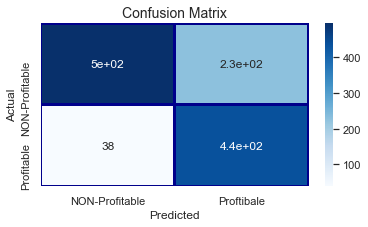

In [36]:
target ='ROI'
CMTD = pd.crosstab(test_target,NBPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

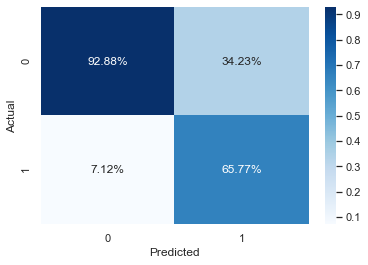

In [37]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [38]:
# Accuracy Score
ACNB= accuracy_score(test_target, NBPred)

print(" NB Prediction Accuracy : {:.2f}%".format(ACNB * 100))
# print()

 NB Prediction Accuracy : 77.83%


# Logistic Regression

In [39]:
# Create the model using LogisticRegression class
LRModel = LogisticRegression(random_state = 45) # SEED. IN R


In [40]:
# Fitting the Model
LRModel.fit(training_features, training_target)

LogisticRegression(random_state=45)

In [41]:
%%time

# Predicting the Test set results

LRPred =LRModel.predict(test_features)

Wall time: 992 µs


In [42]:
# Making the Confusion Matrix
CMLR= confusion_matrix(test_target, LRPred)
CMLR

array([[715,   9],
       [  1, 475]], dtype=int64)

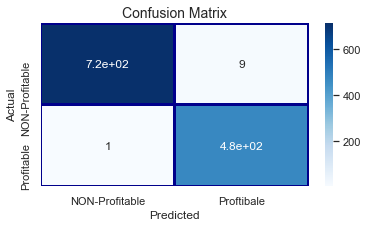

In [43]:
target ='ROI'
CMTD = pd.crosstab(test_target, LRPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

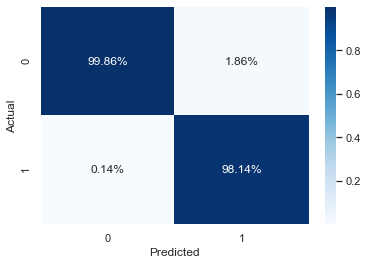

In [44]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [45]:
# Accuracy Score
ACLR= accuracy_score(test_target, LRPred )

print(" LGR Prediction Accuracy : {:.2f}%".format(ACLR * 100))


 LGR Prediction Accuracy : 99.17%


# SVM

# Split

In [46]:
from sklearn.model_selection import train_test_split
X = Box_officeV3.drop('ROI', axis = 1)
y = Box_officeV3.ROI

training_features, test_features, \
training_target, test_target, = train_test_split(X,y, test_size = .2, random_state= 45)

# Scale

In [47]:
robust_scaler = RobustScaler()
training_features = robust_scaler.fit_transform(training_features)
test_features = robust_scaler.transform(test_features)

In [48]:
SVMModel = SVC(kernel = 'linear', random_state = 45,probability = True)

In [49]:
SVMModel.fit(training_features, training_target)

SVC(kernel='linear', probability=True, random_state=45)

In [50]:
%%time

# Predicting the Test set results
SVMPred = SVMModel.predict(test_features)

Wall time: 9.01 ms


In [51]:
# Making the Confusion Matrix
CMSVM= confusion_matrix(test_target, SVMPred)
CMSVM

array([[719,   5],
       [  1, 475]], dtype=int64)

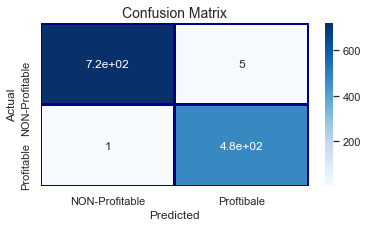

In [52]:
target ='ROI'
CMTD = pd.crosstab(test_target, SVMPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

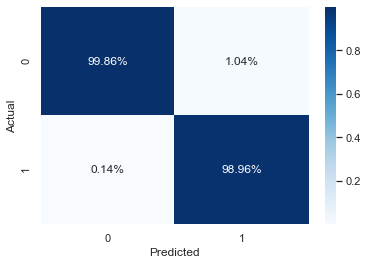

In [53]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [54]:
# Accuracy Score
ACSVM= accuracy_score(test_target, SVMPred )

print(" SVM Prediction Accuracy : {:.2f}%".format(ACSVM * 100))

 SVM Prediction Accuracy : 99.50%


# KSVM

In [55]:
KSVMModel = SVC(kernel = 'rbf', random_state = 0,probability = True)
KSVMModel.fit(training_features, training_target)

SVC(probability=True, random_state=0)

In [56]:
%%time

# Predicting the Test set results
KSVMPred = KSVMModel.predict(test_features)

Wall time: 36 ms


In [57]:
# Making the Confusion Matrix
CMKSVM = confusion_matrix(test_target, KSVMPred)
CMKSVM

array([[708,  16],
       [  8, 468]], dtype=int64)

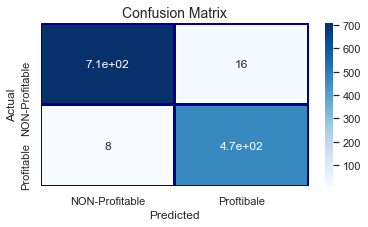

In [58]:
target ='ROI'
CMTD = pd.crosstab(test_target,KSVMPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

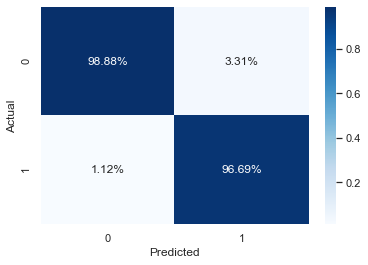

In [59]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [60]:
# Accuracy Score
ACKSVM= accuracy_score(test_target, KSVMPred)
print(ACKSVM)

0.98


# KNN

In [61]:
KNNModel = KNeighborsClassifier(n_neighbors = 21)

KNNModel.fit(training_features, training_target)

KNeighborsClassifier(n_neighbors=21)

In [62]:
%%time

# Predicting the Test set results

KNNpred = KNNModel.predict(test_features)

Wall time: 72.9 ms


In [63]:
# Confusion Matrix
CMKNN = confusion_matrix(test_target,KNNpred)
CMKNN

array([[672,  52],
       [ 45, 431]], dtype=int64)

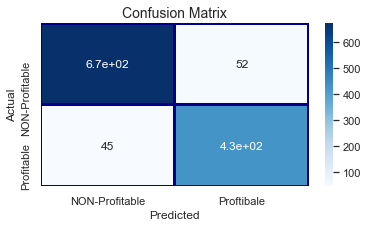

In [64]:
target ='ROI'
CMTD = pd.crosstab(test_target, KNNpred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

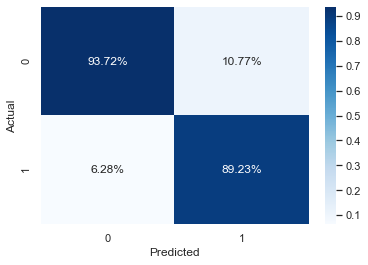

In [65]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [66]:
# Accuracy Score
ACKNN= accuracy_score(test_target, KNNpred )
print(ACKNN)

0.9191666666666667


# Ensemble Methods:Random Forest

In [67]:
RFModel = RandomForestClassifier( n_estimators = 109, max_features= 7, oob_score= True, random_state= 42)

RFModel.fit(training_features, training_target)

RandomForestClassifier(max_features=7, n_estimators=109, oob_score=True,
                       random_state=42)

In [68]:
# Predicting the Test set results
RFPred = RFModel.predict(test_features)

In [69]:
# Making the Confusion Matrix
CMRF= confusion_matrix(test_target, RFPred)
CMRF

array([[715,   9],
       [  2, 474]], dtype=int64)

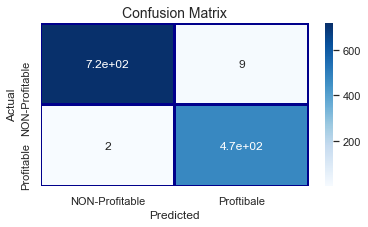

In [70]:
target ='ROI'
CMTD = pd.crosstab(test_target, RFPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

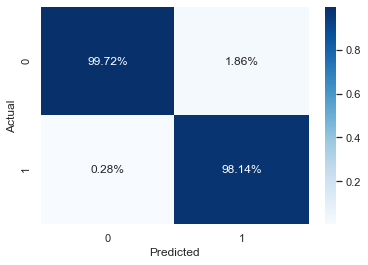

In [71]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [72]:
# Accuracy Score
ACRF= accuracy_score(test_target, RFPred )
print(ACRF)

0.9908333333333333


# Out-Of-Bag

In [73]:
RFModel.fit(training_features, training_target)
print('Training Accuracy:\t\t',ACRF)
print('Validation Accuracy(OOB Score):\t',RFModel.oob_score_)
print('Testing Accuracy:\t\t',RFModel.score(test_features , test_target))
print('Accuracy Difference:\t\t', RFModel.oob_score_ - RFModel.score(test_features , test_target))
#round(RFModel2.abs(ans6b - ans6c),4)

Training Accuracy:		 0.9908333333333333
Validation Accuracy(OOB Score):	 0.9864583333333333
Testing Accuracy:		 0.9908333333333333
Accuracy Difference:		 -0.004375000000000018


In [74]:
RFModel.oob_score_

0.9864583333333333

# Ensemble Methods: Bagging 

In [75]:
BModel = BaggingClassifier(tree.DecisionTreeClassifier(random_state=45), n_estimators = 109)
BModel

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                  n_estimators=109)

In [76]:
BModel.fit(training_features, training_target)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=45),
                  n_estimators=109)

In [77]:
# Predicting the Test set results
BaggPred = BModel.predict(test_features)

In [78]:
# Making the Confusion Matrix
CMBagg= confusion_matrix(test_target, BaggPred)
CMBagg 
#keeps changing

array([[715,   9],
       [  2, 474]], dtype=int64)

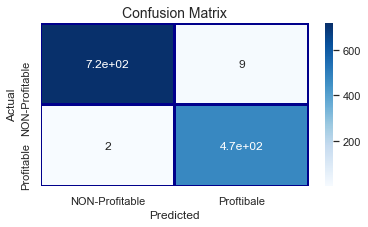

In [79]:
target ='ROI'
CMTD = pd.crosstab(test_target, BaggPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

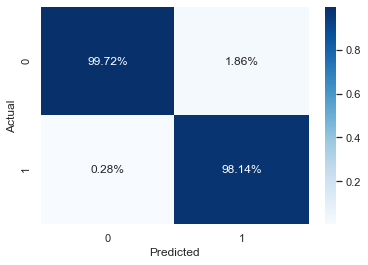

In [80]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [81]:
# Accuracy Score
ACBagg= accuracy_score(test_target, BaggPred )
print(ACBagg)

0.9908333333333333


# Ensemble Methods: AdaBoost Classifier

In [82]:
ADBModel = AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R') 
ADBModel.fit(training_features, training_target)

AdaBoostClassifier(learning_rate=0.7, n_estimators=53, random_state=42)

In [83]:
# Predicting the Test set results
ADBPred = ADBModel.predict(test_features)

In [84]:
# Making the Confusion Matrix
CMADB= confusion_matrix(test_target, ADBPred)
CMADB

array([[697,  27],
       [  6, 470]], dtype=int64)

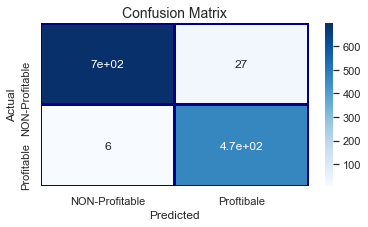

In [85]:
target ='ROI'
CMTD = pd.crosstab(test_target, ADBPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

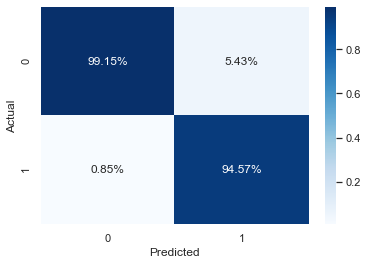

In [86]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [87]:
# Accuracy Score
ACADB= accuracy_score(test_target, ADBPred )
print(ACADB)

0.9725


# Ensemble Methods: Gradient Boosting

In [88]:
# Initialize boosted tree
GBModel = GradientBoostingClassifier()

# Fit boosted tree
GBModel.fit(training_features, training_target)

GradientBoostingClassifier()

In [89]:
# Predicting the Test set results
GBPred = GBModel.predict(test_features)

In [90]:
# Making the Confusion Matrix
CMGB= confusion_matrix(test_target, GBPred)
CMGB

array([[712,  12],
       [  3, 473]], dtype=int64)

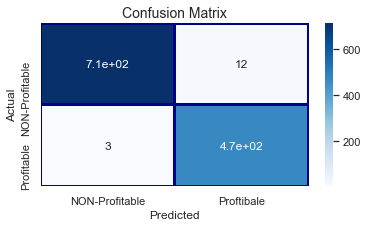

In [91]:
target ='ROI'
CMTD = pd.crosstab(test_target, GBPred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(6,3))
sns.heatmap(CMTD, 
            xticklabels=['NON-Profitable', 'Proftibale'],
            yticklabels=['NON-Profitable', 'Profitable'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

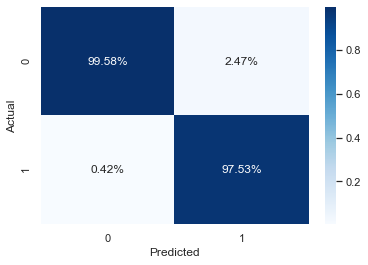

In [92]:
sns.heatmap(CMTD/np.sum(CMTD), annot=True, 
            fmt='.2%', cmap='Blues')

In [93]:
# Accuracy Score
ACGB= accuracy_score(test_target, GBPred )
print(ACGB)

0.9875


# Model Comparison

In [94]:
# Accuracy Score
print(" Random Prediction on frequency                            : {:.2f}%".format(score * 100))
print(" Decision Tree Prediction Accuracy                         : {:.2f}%".format(ADT * 100))
print(" Naive Byes Prediction Accuracy                            : {:.2f}%".format(ACNB    *   100))
print(" Logistic Regression Prediction Accuracy                   : {:.2f}%".format(ACLR    *   100))
print(" Support Vector Machine Prediction Accuracy                : {:.2f}%".format(ACSVM   *   100))
print(" K-Support Vector Machine Prediction Accuracy              : {:.2f}%".format(ACKSVM  *   100)) 
print(" KNN Prediction Accuracy                                   : {:.2f}%".format(ACKNN  *   100)) 
print(" Random Forest Prediction Accuracy                         : {:.2f}%".format(ACRF * 100))
print(" Ensemble - Bagging Prediction Accuracy                    : {:.2f}%".format(ACBagg * 100))
print(" Ensemble - Ada-Boost Prediction Accuracy                  : {:.2f}%".format(ACADB * 100)) 
print(" Ensemble - Gradient Boosting Prediction Accuracy          : {:.2f}%".format(ACGB * 100))



 Random Prediction on frequency                            : 60.33%
 Decision Tree Prediction Accuracy                         : 88.83%
 Naive Byes Prediction Accuracy                            : 77.83%
 Logistic Regression Prediction Accuracy                   : 99.17%
 Support Vector Machine Prediction Accuracy                : 99.50%
 K-Support Vector Machine Prediction Accuracy              : 98.00%
 KNN Prediction Accuracy                                   : 91.92%
 Random Forest Prediction Accuracy                         : 99.08%
 Ensemble - Bagging Prediction Accuracy                    : 99.08%
 Ensemble - Ada-Boost Prediction Accuracy                  : 97.25%
 Ensemble - Gradient Boosting Prediction Accuracy          : 98.75%


# Model Assessment

In [95]:
DTPred     = DecisionTreeModel.predict(test_features)
NBPred     = NBModel.predict(test_features)
LRPred     = LRModel.predict(test_features)
SVMPred    = SVMModel.predict(test_features)
KSVMPred   = KSVMModel.predict(test_features)
KNNpred    = KNNModel.predict(test_features)
RFPred     = RFModel.predict(test_features)
BaggPred   = BModel.predict(test_features)
ADBPred    = ADBModel.predict(test_features)
GBPred     = GBModel.predict(test_features)

In [96]:
AST_DT   = classification_report(test_target, DTPred)
AST_NB   = classification_report(test_target, NBPred)
AST_LR   = classification_report(test_target, LRPred)
AST_SVM = classification_report(test_target,  SVMPred)
AST_KSVM = classification_report(test_target, KSVMPred)
AST_KNN  = classification_report(test_target, KNNpred)
AST_RF   = classification_report(test_target, RFPred)
AST_Bagg = classification_report(test_target, BaggPred)
AST_ADB  = classification_report(test_target, ADBPred)
AST_GB   = classification_report(test_target, GBPred)

In [97]:
print("Decision Tree Classification Report \n\n " , AST_DT)
print("Naive Byese Classification Report \n\n " , AST_NB)
print("Logistic Regression Classification Report \n\n " , AST_LR)
print("Support Vector Machine Classification Report \n\n " , AST_SVM)
print("Kernel Support Vector Machine Classification Report \n\n " , AST_KSVM)
print("K-Nearest Neighbors Classification Report \n\n " , AST_KNN)
print("Random Forest Classification Report \n\n " , AST_RF)
print("Bagging Classification Report \n\n " , AST_Bagg)
print("Ad-Boost Classification Report \n\n " , AST_ADB)
print("Gradient Boosting Classification Report \n\n " , AST_GB)


Decision Tree Classification Report 

                precision    recall  f1-score   support

           0       0.60      1.00      0.75       724
           1       0.00      0.00      0.00       476

    accuracy                           0.60      1200
   macro avg       0.30      0.50      0.38      1200
weighted avg       0.36      0.60      0.45      1200

Naive Byese Classification Report 

                precision    recall  f1-score   support

           0       0.93      0.69      0.79       724
           1       0.66      0.92      0.77       476

    accuracy                           0.78      1200
   macro avg       0.79      0.80      0.78      1200
weighted avg       0.82      0.78      0.78      1200

Logistic Regression Classification Report 

                precision    recall  f1-score   support

           0       1.00      0.99      0.99       724
           1       0.98      1.00      0.99       476

    accuracy                           0.99      1200
   m

# Overlaid ROC Curve

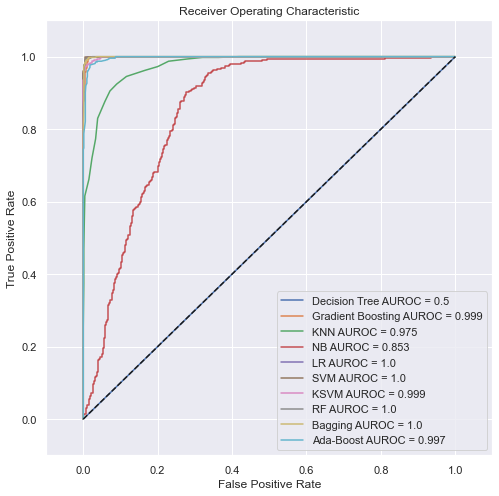

In [98]:
# Initialize plot
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')


#---------------------------------------------------------------- 1- DT---- #

# Predicts X_test using model
DT_pred = DecisionTreeModel.predict_proba(test_features)
DT_pred = [p[1] for p in DT_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, DT_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Decision Tree', auroc))



#---------------------------------------------------------------- 2- GB ---- #

# Predicts X_test using model
GB_pred = GBModel.predict_proba(test_features)
GB_pred = [p[1] for p in GB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, GB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Gradient Boosting', auroc))


#---------------------------------------------------------------- 3 - KNN---- #

# Predicts test_features using model
KNN_pred = KNNModel.predict_proba(test_features)
KNN_pred = [p[1] for p in KNN_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KNN_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KNN', auroc))


#---------------------------------------------------------------- 4- NB---- #
# Predicts test_features using model
NB_pred = NBModel.predict_proba(test_features)
NB_pred = [p[1] for p in NB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, NB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('NB', auroc))


#---------------------------------------------------------------- 5 - LR ---- #
# Predicts test_features using model
LR_pred = LRModel.predict_proba(test_features)
LR_pred = [p[1] for p in LR_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, LR_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('LR', auroc))


# #---------------------------------------------------------------- 6 - SVM ---- #
# Predicts test_features using model
SVM_pred = SVMModel.predict_proba(test_features)
SVM_pred = [p[1] for p in SVM_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, SVM_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('SVM', auroc))

# #---------------------------------------------------------------- 6 - KSVM ---- #
# # Predicts test_features using model
KSVM_pred = KSVMModel.predict_proba(test_features)
KSVM_pred = [p[1] for p in KSVM_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, KSVM_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('KSVM', auroc))
#---------------------------------------------------------------- 7 - RF ---- #
# Predicts test_features using model
RF_pred = RFModel.predict_proba(test_features)
RF_pred = [p[1] for p in RF_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, RF_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('RF', auroc))


#---------------------------------------------------------------- 8 - Bagging ---- #
# Predicts test_features using model
Bagg_pred = BModel.predict_proba(test_features)
Bagg_pred = [p[1] for p in Bagg_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, Bagg_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Bagging', auroc))


#---------------------------------------------------------------- 9 - Ada-Boost ---- #
# Predicts test_features using model
ADB_pred = ADBModel.predict_proba(test_features)
ADB_pred = [p[1] for p in ADB_pred]
    
# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(test_target, ADB_pred)
    
# Calculates AUROC
auroc = round(auc(fpr, tpr), 3)
    
# Plots ROC curve and labels with AUROC
plt.plot(fpr, tpr, label='{} AUROC = {}'.format('Ada-Boost', auroc))





# ---- Legend and labels ---- #

# Plot legend
plt.legend(loc='lower right')

# Plots 45 degree dotted black line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model selection: Cross Validation

In [99]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('BAG  ', BaggingClassifier()))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))


results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART   : 0.978958 (0.004814)
GNB    : 0.780833 (0.014887)
LRM    : 0.988125 (0.005043)
SVM    : 0.990625 (0.002083)
KSVM   : 0.973750 (0.005246)
KNN    : 0.885417 (0.012690)
RFM    : 0.984375 (0.004974)
BAG    : 0.980625 (0.005878)
ABM    : 0.963125 (0.010757)
GBM    : 0.978750 (0.004956)


In [100]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('BAG  ', BaggingClassifier()))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))


results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, test_features, test_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

CART   : 0.970000 (0.012748)
GNB    : 0.780000 (0.009647)
LRM    : 0.980833 (0.010069)
SVM    : 0.990000 (0.005652)
KSVM   : 0.958333 (0.018066)
KNN    : 0.859167 (0.019791)
RFM    : 0.980000 (0.011607)
BAG    : 0.980000 (0.008498)
ABM    : 0.975833 (0.010000)
GBM    : 0.975833 (0.014530)


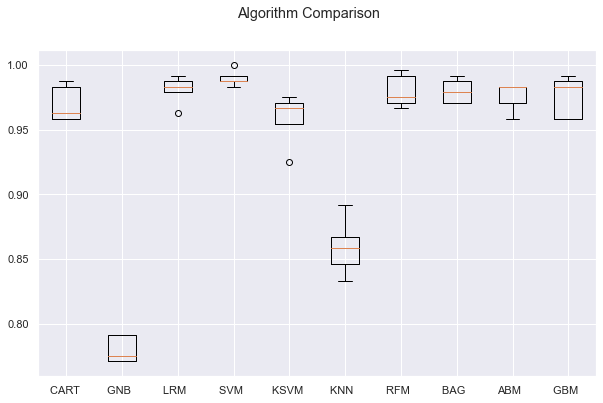

In [101]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()